In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load datasets
client_info = pd.read_csv(r"C:\Users\ttmai\github\2022_datathon_team_2\data\client_info_anonymized.csv")
care_mgmt = pd.read_csv(r"C:\Users\ttmai\github\2022_datathon_team_2\data\care_management_anonymized.csv")
volunteer_services = pd.read_csv(r"C:\Users\ttmai\github\2022_datathon_team_2\data\volunteer_services_anonymized.csv")
pantry = pd.read_csv(r"C:\Users\ttmai\github\2022_datathon_team_2\data\pantry_anonymized.csv")
donations = pd.read_csv(r"C:\Users\ttmai\github\2022_datathon_team_2\data\donations_anonymized.csv")

# Explore client info

In [3]:
# Get overview
print(client_info.head())
print(client_info.count())
print(client_info.info())

   anon_ID      county poverty minority age_group
0        1  Montgomery      No      NaN         P
1        2  Montgomery      No       No         D
2        3  Montgomery      No       No         P
3        5  Montgomery      No      NaN         G
4        6  Montgomery     Yes      NaN       NaN
anon_ID      641
county       641
poverty      601
minority     156
age_group    424
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   anon_ID    641 non-null    int64 
 1   county     641 non-null    object
 2   poverty    601 non-null    object
 3   minority   156 non-null    object
 4   age_group  424 non-null    object
dtypes: int64(1), object(4)
memory usage: 25.2+ KB
None


In [4]:
# Distribution by each category provided in dataset
for c in client_info.columns[1:]:
    print(client_info.groupby(c).count())

            anon_ID  poverty  minority  age_group
county                                           
Montgomery      601      601       118        424
Other            40        0        38          0
         anon_ID  county  minority  age_group
poverty                                      
No           215     215        52        192
Yes          386     386        66        232
          anon_ID  county  poverty  age_group
minority                                     
No            108     108       76         73
Yes            48      48       42         40
           anon_ID  county  poverty  minority
age_group                                    
D               95      95       95        36
G              174     174      174        18
P               64      64       64        29
T               91      91       91        30


In [5]:
# Any relationship between poverty and minority?
client_info.groupby(['poverty', 'minority']).count()

anon_ID  county  age_group
poverty minority                            
No      No             42      42         42
        Yes            10      10          9
Yes     No             34      34         31
        Yes            32      32         31

## Some observations from reviewing client data:
- The only county identified in this dataset is Montgomery. 93% clients come from this county.
- More clients have poverty flag than not (64%). A small volume of clients do not have poverty flag populated.
- There's a lot of missing data under the minority field. Will likely not use this field for future analyses.
- There are 4 age groups (5 if include 1 category with missing data on age). Not sure how I will leverage this field for future analyses.

# Explore care management data

In [6]:
# Get overview
care_mgmt.head()
# print()
# print()

,anon_ID,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3
0,531,2019-01-01 12:50:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,531,2019-01-02 07:30:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,581,2019-01-02 09:50:00,"Remote Contact with client (phone, email)",14.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,337,2019-01-02 10:10:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,254,2019-01-02 10:15:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
care_mgmt.count()

anon_ID                12487
assistance_date        12487
assistance_category    12487
amount                 12487
unit                   12487
CommType                4668
Party                   4675
InitiatedBy             4645
Benefit_1               4060
Assistance_1            4126
Benefit_2                591
Assistance_2             588
Benefit_3                 84
Assistance_3              83
dtype: int64

In [8]:
care_mgmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12487 entries, 0 to 12486
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   anon_ID              12487 non-null  int64  
 1   assistance_date      12487 non-null  object 
 2   assistance_category  12487 non-null  object 
 3   amount               12487 non-null  float64
 4   unit                 12487 non-null  object 
 5   CommType             4668 non-null   object 
 6   Party                4675 non-null   object 
 7   InitiatedBy          4645 non-null   object 
 8   Benefit_1            4060 non-null   object 
 9   Assistance_1         4126 non-null   object 
 10  Benefit_2            591 non-null    object 
 11  Assistance_2         588 non-null    object 
 12  Benefit_3            84 non-null     object 
 13  Assistance_3         83 non-null     object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.3+ MB


In [9]:
# Data cleaning
care_mgmt['assistance_date'] = pd.to_datetime(care_mgmt['assistance_date'])
care_mgmt.shape

(12487, 14)

In [10]:
print('First date in dataset: ', care_mgmt['assistance_date'].min())
print('Last date in dataset: ', care_mgmt['assistance_date'].max())
print('Number of clients receiving care management: ', care_mgmt['anon_ID'].nunique())
print('Average number of interactions each client has: ', care_mgmt.shape[0]/care_mgmt['anon_ID'].nunique())

First date in dataset:  2019-01-01 12:50:00
Last date in dataset:  2021-09-15 18:05:00
Number of clients receiving care management:  490
Average number of interactions each client has:  25.483673469387757


In [11]:
care_mgmt.groupby(['assistance_category', 'unit']).count()

anon_ID  assistance_date  \
assistance_category                       unit                                
Community                                 Minutes      757              757   
ElderNet Office                           Minutes       47               47   
Home Visit                                Minutes      766              766   
Internal Discussions                      Dollars       10               10   
                                          Minutes      222              222   
                                          Pounds         1                1   
Remote Contact w/o client                 Minutes     1948             1948   
Remote Contact with client (phone, email) Minutes     8735             8735   
                                          Pounds         1                1   

                                                   amount  CommType  Party  \
assistance_category                       unit                               
Community                                 Minutes     757       100    101   
ElderNet Office                           Minutes      47         2      2   
Home Visit                                Minutes     766        24     24   
Internal Discussions                      Dollars      10         7      8   
                                          Minutes     222       149    168   
                                          Pounds        1         1      1   
Remote Contact w/o client                 Minutes    1948      1220   1202   
Remote Contact with client (phone, email) Minutes    8735      3165   3169   
                                          Pounds        1         0      0   

                                                   InitiatedBy  Benefit_1  \
assistance_category                       unit                              
Community                                 Minutes           90         96   
ElderNet Office                           Minutes            2          2   
Home Visit                                Minutes           15         22   
Internal Discussions                      Dollars            8          8   
                                          Minutes          169        157   
                                          Pounds             1          1   
Remote Contact w/o client                 Minutes         1212       1031   
Remote Contact with client (phone, email) Minutes         3148       2743   
                                          Pounds             0          0   

                                                   Assistance_1  Benefit_2  \
assistance_category                       unit                               
Community                                 Minutes            99         27   
ElderNet Office                           Minutes             2          0   
Home Visit                                Minutes            24          6   
Internal Discussions                      Dollars             8          1   
                                          Minutes           158         16   
                                          Pounds              1          0   
Remote Contact w/o client                 Minutes          1064         76   
Remote Contact with client (phone, email) Minutes          2770        465   
                                          Pounds              0          0   

                                                   Assistance_2  Benefit_3  \
assistance_category                       unit                               
Community                                 Minutes            27          6   
ElderNet Office                           Minutes             0          0   
Home Visit                                Minutes             6          2   
Internal Discussions                      Dollars             1          0   
                                          Minutes            15          1   
                                          Pounds              0      

In [12]:
# Explore some weird values
care_mgmt.loc[(care_mgmt['assistance_category'] == 'Remote Contact with client (phone, email)') & (care_mgmt['unit'] == 'Pounds'),:]

,anon_ID,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3
11922,284,2021-06-01 12:35:00,"Remote Contact with client (phone, email)",25.0,Pounds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
care_mgmt.loc[(care_mgmt['assistance_category'] == 'Internal Discussions') & (care_mgmt['unit'] == 'Pounds'),:]

,anon_ID,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3
8226,569,2020-05-27 13:15:00,Internal Discussions,25.0,Pounds,Call,Eldernet,Eldernet,Safety,Coordination,NaN,NaN,NaN,NaN


In [14]:
# Clean up values on categorical columns
party = {"Clinet": "Client", "Eldernet": "ElderNet"}
benefit = {"Eldernet": "ElderNet", "Pets": "Pet", "Telecommunications": "Telecommunication", "Financial ": "Financial"}
care_mgmt = care_mgmt.replace({"Party": party, "Benefit_1": benefit, "Benefit_2": benefit, "Benefit_3": benefit})

In [15]:
care_mgmt.groupby('Party').count()['anon_ID'].nlargest(9000)

Party
Client              3273
Service Provider     619
Family               279
ElderNet             239
Other                126
Social Worker         84
Friend                41
Care Manager          12
Care Coordinator       2
Name: anon_ID, dtype: int64

In [16]:
benefit_all = care_mgmt.loc[:, ['anon_ID', 'Benefit_1', 'Benefit_2', 'Benefit_3']].melt(id_vars='anon_ID', var_name='benefit_ID', value_name='benefit_category')
benefit_all.groupby('benefit_category').count()['anon_ID'].nlargest(9000)

benefit_category
ElderNet             1819
Medical               751
Housing               662
Financial             502
Food                  260
Legal                 192
ADL                   152
Utilities             119
Social                 91
Safety                 75
Transportation         67
Telecommunication      31
Pet                     8
Information             3
Benefit_1               1
Coordination            1
Support                 1
Name: anon_ID, dtype: int64

In [17]:
# Frequency of care management engagement
engagement_agg = care_mgmt.groupby('anon_ID')
engagement_agg = engagement_agg.agg({'assistance_date': [np.min, np.max, "count"]})
engagement_agg.columns = ['min_date', 'max_date', 'engagements']
engagement_agg['engagement_days'] = (engagement_agg['max_date'] - engagement_agg['min_date']).dt.days
engagement_agg.head()

,min_date,max_date,engagements,engagement_days
anon_ID,,,,
1,2021-06-22 15:20:00,2021-07-19 14:15:00,2,26
2,2019-06-04 10:10:00,2020-05-01 16:35:00,3,332
3,2019-07-17 10:55:00,2020-04-10 16:20:00,4,268
5,2019-12-26 13:30:00,2020-09-01 15:15:00,3,250
7,2020-01-02 13:00:00,2020-01-10 15:50:00,3,8


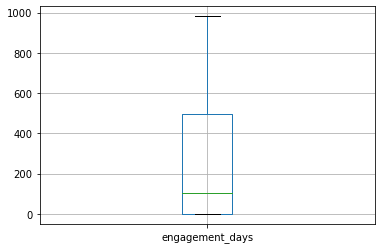

In [18]:
# What's the length from first to last engagement per client?
import matplotlib.pyplot as plt
%matplotlib inline
engagement_agg.boxplot(column='engagement_days')

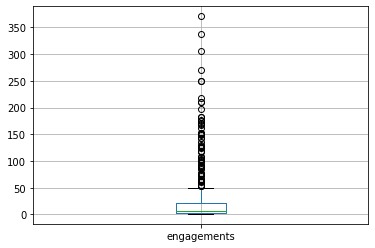

In [19]:
# What's the number of engagements a client has?
engagement_agg.boxplot(column='engagements')

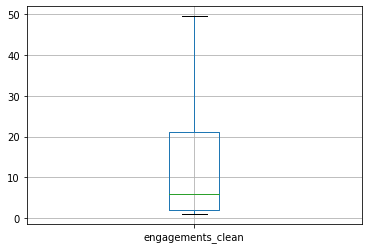

In [20]:
# Since there are multiple outliers for this metric, need to replace outlier values with IQR (innter quartile range)
def remove_outlier(col):
    sorted(col)
    q1, q3 = col.quantile([0.25, 0.75])
    iqr = q3-q1
    lower_range = q1-(1.5 * iqr)
    upper_range = q3+(1.5 * iqr)
    new_col = col
    new_col = np.where(new_col>upper_range, upper_range, new_col)
    new_col = np.where(new_col<lower_range, lower_range, new_col)
    return new_col
#     lower_range, upper_range
# lower_days, upper_days = remove_outlier(engagement_agg['engagements'])
engagement_agg['engagements_clean'] = remove_outlier(engagement_agg['engagements'])
# engagement_agg['engagements_clean'] = np.where(engagement_agg['engagements_clean']>upper_days, upper_days, engagement_agg['engagements_clean'])
# engagement_agg['engagements_clean'] = np.where(engagement_agg['engagements_clean']<lower_days, lower_days, engagement_agg['engagements_clean'])
engagement_agg.boxplot(column='engagements_clean')

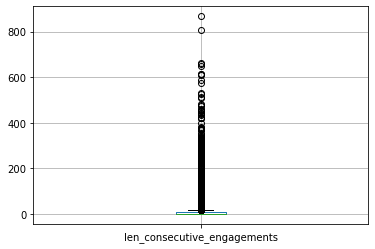

In [21]:
# What's the number of days between 2 consecutive engagements?
engagements = care_mgmt.loc[:, ['anon_ID', 'assistance_date']].sort_values(['anon_ID', 'assistance_date'])
shifted = engagements.shift(-1).fillna(0)
shifted['anon_ID'] = shifted['anon_ID'].astype(int)
shifted['Use'] = engagements['anon_ID'] == shifted['anon_ID']
engagements['next_assistance_date'] = shifted.apply(lambda x: x['assistance_date'] if x['Use'] else None, axis=1)
engagements = engagements.dropna(subset = ['next_assistance_date'])
engagements['len_consecutive_engagements'] = (engagements['next_assistance_date'] - engagements['assistance_date']).dt.days
engagements.boxplot(column='len_consecutive_engagements')

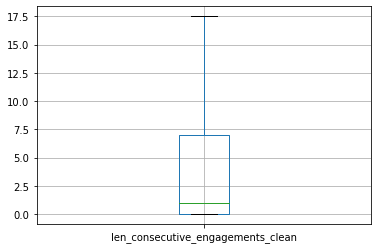

In [22]:
engagements['len_consecutive_engagements_clean'] = remove_outlier(engagements['len_consecutive_engagements'])
engagements.boxplot(column='len_consecutive_engagements_clean')

In [28]:
# Check for correlation between different engagement length metrics explored above.
# Only consider clients who had at least 2 engagements
engagement_agg = engagement_agg.loc[engagement_agg['engagements'] >= 2, :]
avg_engagement_len = engagements.groupby('anon_ID').agg({'len_consecutive_engagements': [np.min, np.max, "mean", "median"],
                                                        'len_consecutive_engagements_clean': [np.min, np.max, "mean", "median"]})
avg_engagement_len.columns = ['min_len_consecutive_engagements', 
                             'max_len_consecutive_engagements', 'mean_len_consecutive_engagements', 'median_len_consecutive_engagements',
                             'min_len_consecutive_engagements_clean', 'max_len_consecutive_engagements_clean',
                             'mean_len_consecutive_engagements_clean', 'median_len_consecutive_engagements_clean']
avg_engagement_len.head()
engagement_agg_merged = engagement_agg.merge(avg_engagement_len,
                                     how = 'left',
                                     on = 'anon_ID')

In [29]:
engagement_agg_merged.head()

,min_date,max_date,engagements,engagement_days,engagements_clean,min_len_consecutive_engagements,max_len_consecutive_engagements,mean_len_consecutive_engagements,median_len_consecutive_engagements,min_len_consecutive_engagements_clean,max_len_consecutive_engagements_clean,mean_len_consecutive_engagements_clean,median_len_consecutive_engagements_clean
anon_ID,,,,,,,,,,,,,
1,2021-06-22 15:20:00,2021-07-19 14:15:00,2,26,2.0,26,26,26.0,26.0,17.5,17.5,17.5,17.5
2,2019-06-04 10:10:00,2020-05-01 16:35:00,3,332,3.0,95,237,166.0,166.0,17.5,17.5,17.5,17.5
3,2019-07-17 10:55:00,2020-04-10 16:20:00,4,268,4.0,0,259,89.0,8.0,0.0,17.5,8.5,8.0
5,2019-12-26 13:30:00,2020-09-01 15:15:00,3,250,3.0,109,140,124.5,124.5,17.5,17.5,17.5,17.5
7,2020-01-02 13:00:00,2020-01-10 15:50:00,3,8,3.0,0,7,3.5,3.5,0.0,7.0,3.5,3.5


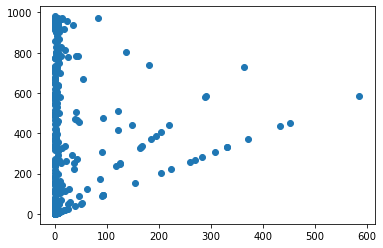

In [34]:
# Is there any correlation between length of consecutive engagements and the overall engagement length from first to last day?
# i.e If a client is frequently engaged (not too many days between consecutive engagements), does that reduces the overall engagement length?
plt.scatter(engagement_agg_merged['median_len_consecutive_engagements'], engagement_agg_merged['engagement_days'])

Can see 3 different categories here. Are there any special patterns that can help us categorize clients or is this just random?

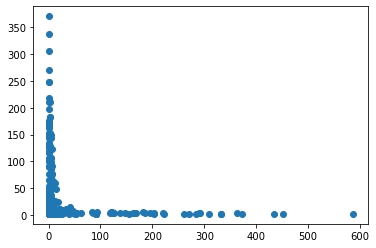

In [38]:
# Is there any correlation between length of consecutive engagements and the overall number of engagements?
# i.e If a client is frequently engaged, does that reduces number of engagements required?
plt.scatter(engagement_agg_merged['median_len_consecutive_engagements'], engagement_agg_merged['engagements'])

In [39]:
# Add categorical columns, one for each benefit type as the count for that benefit category (ex: ElderNet: 20), and the benefit category that the client utilizes the most
# Find common characteristics among the clients who have a high number of engagements
# Do they start off with the same benefit type inquiry?

Note: Client-profiling dashboard? What has been discussed with this specific client in the past? What are the things clients like this potentially will need in the future (using machine learning)

Challenges with ElderNet